In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from lmfit import Parameters, minimize, fit_report
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

In [2]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a* x **b
        
        return y_fit-y

In [3]:
dataBase_path = r'./'
dataBase_file = r'UUVDatabase.xlsx'
linkage_file = r'./linkage_study/linkage_data.xlsx'

In [4]:
data_path = Path(dataBase_path, dataBase_file)
bcfDF = pd.read_excel(data_path, sheet_name = 'BCF')
mpfDF = pd.read_excel(data_path, sheet_name='MPF')
convDF = pd.read_excel(data_path, sheet_name = 'Propeller')
liftDF = pd.read_excel(data_path, sheet_name="LiftBased")

data_path = Path(dataBase_path, linkage_file)
rigidDF = pd.read_excel(data_path, sheet_name='Rigid Tail')
compliantDF = pd.read_excel(data_path, sheet_name='Compliant Tail')

In [5]:
conv_cot = convDF[convDF['COTopt [J/m]'].notnull()]
bcf_cot = bcfDF[bcfDF['COTopt [J/m]'].notnull()]
mpf_cot = mpfDF[mpfDF['COTopt [J/m]'].notnull()]
lift_cot = liftDF[liftDF['COTopt [J/m]'].notnull()]

# sort the column values in ascending order
conv_cot = conv_cot.sort_values('Weight [kg]')
bcf_cot = bcf_cot.sort_values('Weight [kg]')
mpf_cot = mpf_cot.sort_values('Weight [kg]')
lift_cot = lift_cot.sort_values('Weight [kg]')

# drop all rows with nan values
conv_cot.dropna(subset=['Weight [kg]'], inplace=True)
bcf_cot.dropna(subset=['Weight [kg]'], inplace=True)
mpf_cot.dropna(subset=['Weight [kg]'], inplace=True)
lift_cot.dropna(subset=['Weight [kg]'], inplace=True)

In [6]:
# break up the data frame into perspective locomotion modes
conv_modes = conv_cot['Locomotion'].unique()
bcf_modes = bcf_cot['Locomotion'].unique()
mpf_modes = mpf_cot['Locomotion'].unique()
lift_modes = lift_cot['Locomotion'].unique()

conv_dfs = [conv_cot[conv_cot['Locomotion']==mode] for mode in conv_modes]
bcf_dfs = [bcf_cot[bcf_cot['Locomotion']==mode] for mode in bcf_modes]
mpf_dfs = [mpf_cot[mpf_cot['Locomotion']==mode] for mode in mpf_modes]
lift_dfs = [lift_cot[lift_cot['Locomotion']==mode] for mode in lift_modes]

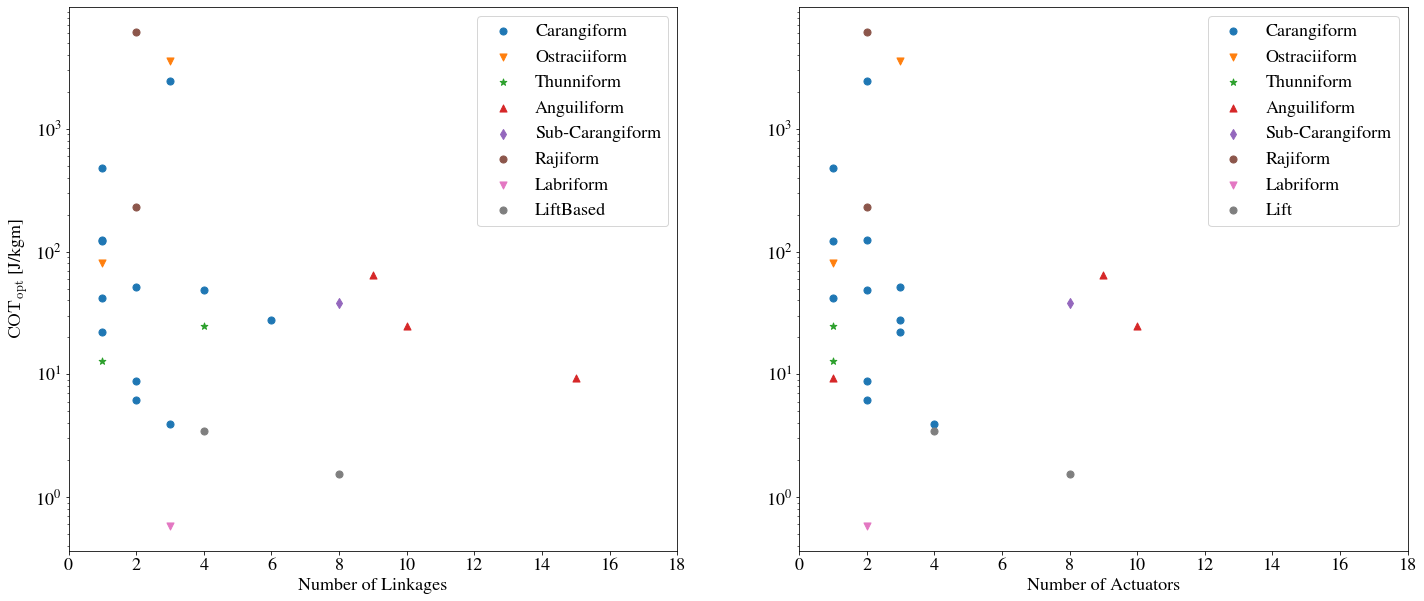

In [7]:
# Plot COT and displacement
plt.rcParams.update({'font.size':18})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'STIXGeneral'})

marker_size=50
fit_method = 'least_squares'

markers = ['o', 'v', '*', '^', 'd']


# plot COT and Number of actuators
fig1, axs = plt.subplots(1, 2, figsize=(24,10), facecolor='w')
axs.flatten()

for i, mode in enumerate(bcf_modes):
    axs[0].scatter(bcf_dfs[i]['No Linkages'], bcf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)
    axs[1].scatter(bcf_dfs[i]['No Actuators'], bcf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)

for i, mode in enumerate(mpf_modes):       
    axs[0].scatter(mpf_dfs[i]['No Linkages'], mpf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)
    axs[1].scatter(mpf_dfs[i]['No Actuators'], mpf_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)

for i, mode in enumerate(lift_modes):
    axs[0].scatter(lift_dfs[i]['No Linkages'], lift_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label=mode)
    axs[1].scatter(lift_dfs[i]['No Actuators'], lift_dfs[i]['COTopt [J/kgm]'], marker=markers[i], s=marker_size, label='Lift')
    
axs[0].set_xlabel('Number of Linkages')
axs[0].set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
axs[0].set_xticks(np.arange(0, 20, 2))
axs[0].set_yscale('log')
axs[0].legend()

axs[1].set_xlabel('Number of Actuators')
#axs[1].set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
axs[1].set_xticks(np.arange(0, 20, 2))
axs[1].set_yscale('log')
axs[1].legend()

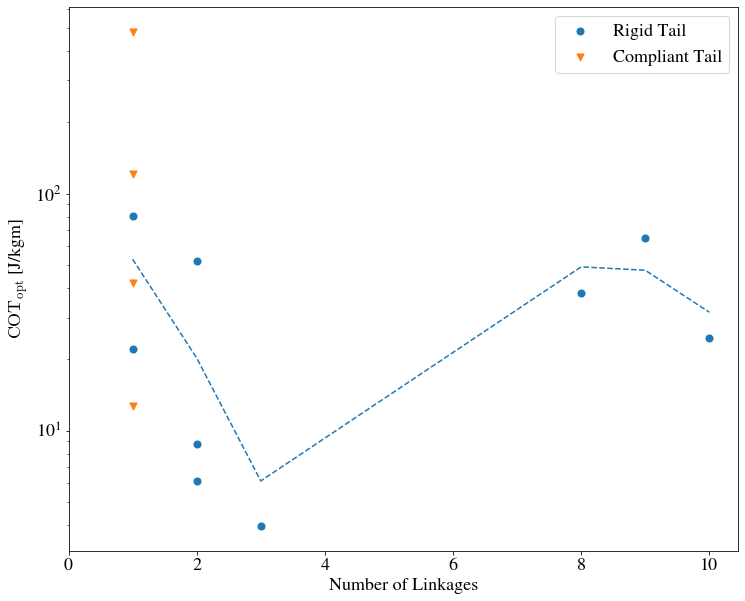

In [11]:
fig2, ax2 = plt.subplots(figsize=(12,10), facecolor='w')
rigidDF.sort_values('No Linkages', inplace=True)
rigid_fit = np.polyfit(rigidDF['No Linkages'], rigidDF['COTopt [J/kgm]'], 3)
rigid_poly = np.poly1d(rigid_fit)
ax2.scatter(rigidDF['No Linkages'], rigidDF['COTopt [J/kgm]'], marker='o', s=marker_size, label='Rigid Tail')
ax2.plot(rigidDF['No Linkages'], rigid_poly(rigidDF['No Linkages']), '--')
ax2.scatter(compliantDF['No Linkages'], compliantDF['COTopt [J/kgm]'], marker='v', s=marker_size, label='Compliant Tail')
ax2.set_xlabel('Number of Linkages')
ax2.set_ylabel('$\mathrm{COT_{opt}}$ [J/kgm]')
ax2.set_xticks(np.arange(0, 12, 2))
ax2.legend()
ax2.set_yscale('log')